### **Successful Attempt**
### **Simple Code with added Frame Visuals + Larger Dataset for improved Robustness + Better Runtime Conditions**
### **76.34% accuracy achieved**

In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from keras.preprocessing import image
import numpy as np
from skimage.transform import resize

In [ ]:
count = 0
videoFile = "Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Sample Frames Done!")

Sample Frames Done!


In [ ]:
videoFile = "Tom and Jerry 6_1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Sample Frames Done!\n",count)

Sample Frames Done!
 416


In [ ]:
videoFile = "Tom and Jerry 6_2.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Sample Frames Done!\n",count)

Sample Frames Done!
 495


In [ ]:
videoFile = "Tom and Jerry 6_3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Sample Frames Done!\n",count)

Sample Frames Done!
 548


In [ ]:
videoFile = "Tom and Jerry 6_4.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Sample Frames Done!\n",count)

Sample Frames Done!
 583


In [ ]:
count = 0
videoFile = "Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Sample Tests Done!")

Sample Tests Done!


In [ ]:
data = pd.read_csv('video1.csv')
test = pd.read_csv('vid2.csv')

In [ ]:
data.head()

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [ ]:
test.head()

,Image_ID,Class
0,test0.jpg,2
1,test1.jpg,2
2,test2.jpg,0
3,test3.jpg,1
4,test4.jpg,2


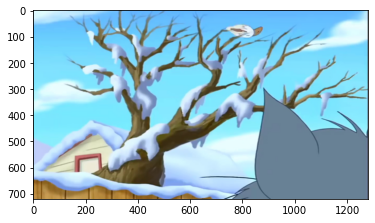

In [ ]:
img = plt.imread('frame21.jpg')
plt.imshow(img)

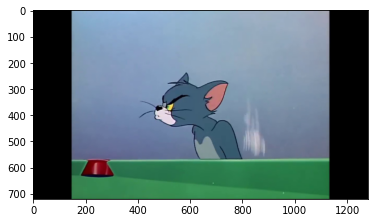

In [ ]:
img = plt.imread('test21.jpg')
plt.imshow(img)

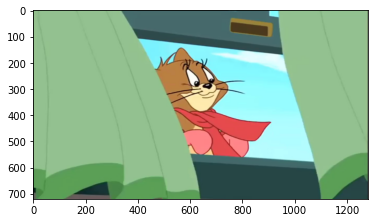

In [ ]:
img = plt.imread('frame0.jpg')
plt.imshow(img)

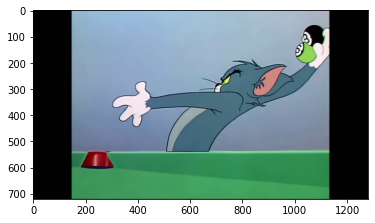

In [ ]:
img = plt.imread('test0.jpg')
plt.imshow(img)

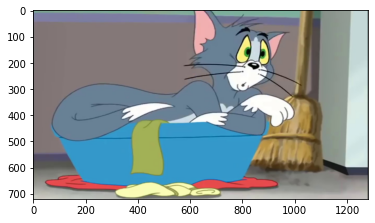

In [ ]:
img = plt.imread('frame2.jpg')
plt.imshow(img)

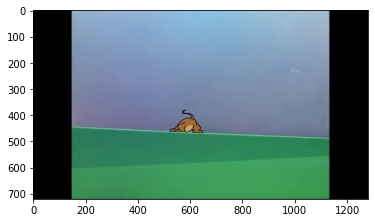

In [ ]:
img = plt.imread('test2.jpg')
plt.imshow(img)

In [ ]:
X = []
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)
X = np.array(X)

In [ ]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [ ]:
from keras.utils import np_utils
train_y = np_utils.to_categorical(data.Class)
test_y = np_utils.to_categorical(test.Class)

In [ ]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224,3)).astype(int)
    image.append(a)
X = np.array(image)

In [ ]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [ ]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')
test_image = preprocess_input(test_image, mode='tf')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, train_y, test_size=0.3, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
test_image = base_model.predict(test_image)

In [ ]:
X_train = X_train.reshape(408, 7*7*512)
X_valid = X_valid.reshape(175, 7*7*512)
test_image = test_image.reshape(186, 7*7*512)

In [ ]:
train = X_train/X_train.max()
X_valid = X_valid/X_train.max()
test_image = test_image/test_image.max()

In [ ]:
model = Sequential()
model.add(InputLayer((7*7*512,)))
model.add(Dense(units=1024, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
class_weights = compute_class_weight('balanced',np.unique(data.Class), data.Class)

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid), class_weight=class_weights, callbacks=callbacks_list)

Train on 408 samples, validate on 175 samples
Epoch 1/100
408/408 [==============================] - 6s 14ms/step - loss: 1.2334 - accuracy: 0.4118 - val_loss: 1.1428 - val_accuracy: 0.4457

Epoch 00001: val_loss improved from inf to 1.14284, saving model to weights.best.hdf5
Epoch 2/100
408/408 [==============================] - 5s 13ms/step - loss: 1.1500 - accuracy: 0.4510 - val_loss: 1.0001 - val_accuracy: 0.5086

Epoch 00002: val_loss improved from 1.14284 to 1.00009, saving model to weights.best.hdf5
Epoch 3/100
408/408 [==============================] - 5s 13ms/step - loss: 0.9970 - accuracy: 0.5343 - val_loss: 0.9464 - val_accuracy: 0.5086

Epoch 00003: val_loss improved from 1.00009 to 0.94643, saving model to weights.best.hdf5
Epoch 4/100
408/408 [==============================] - 5s 13ms/step - loss: 0.8697 - accuracy: 0.6054 - val_loss: 0.7652 - val_accuracy: 0.6914

Epoch 00004: val_loss improved from 0.94643 to 0.76524, saving model to weights.best.hdf5
Epoch 5/100
408/40

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
scores = model.evaluate(test_image, test_y)

186/186 [==============================] - 0s 2ms/step


In [ ]:
predictions = model.predict_classes(test_image)



Accuracy VS Epoch Plot :



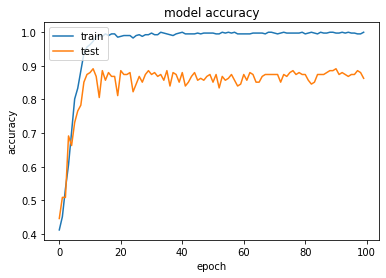

In [ ]:
print("\n\nAccuracy VS Epoch Plot :\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Loss VS Epoch Plot :



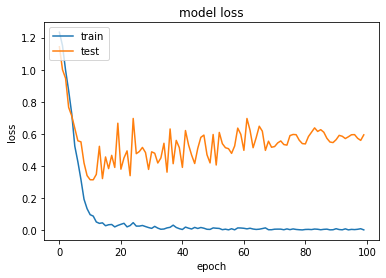

In [ ]:
print("\nLoss VS Epoch Plot :\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("\n\nThe screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("\n\nThe screen time of TOM is", predictions[predictions==2].shape[0], "seconds")



The screen time of JERRY is 52 seconds


The screen time of TOM is 91 seconds


In [ ]:
A = np.array(history.history['val_accuracy'])
acc_mean = A.mean()
print("\n\nThe accuracy value on validation data is %.3f%%" % ((acc_mean)*100))



The accuracy value on validation data is 84.880%


In [ ]:
print("\n\nThe accuracy on testing data is %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



The accuracy on testing data is accuracy: 76.34%


In [ ]:
if(predictions[predictions==1].shape[0]>predictions[predictions==2].shape[0]):
  print("\n\nThis video is to be labeled as _Jerry_")
elif(predictions[predictions==2].shape[0]>predictions[predictions==1].shape[0]):
  print("\n\nThis video is to be labeled as _Tom_")
else:
  print("\n\nThis video is to be labeled as _Tom and Jerry_")



This video is to be labeled as _Tom_
